# E6 : Lin 1998

The Lin measure builds on Resnik's idea of Information Content and adds a normalization factor consisting of the IC of the two input concepts.

$$
Sim_{lin} = \frac{2*IC(LCS)}{IC(concept_{1}) + IC(concept_{2})}
$$

The intuition is that the IC of the LCS represents the shared attributes of $concept_{1}$ and $concept_{2}$ and that is then normalized by all their attributes. So the Lin score gives one a similiarity measure which draws on the attributes concepts share and the attributes that make them different. Notice that if 2 concepts share all the same attributes their IC will be the same and equivalent to $2*IC(LCS)$ such that their similarity is 1. 

#### References

1. [Lin 1998 - An Information Theoretic Definition of Similarity](./papers/Lin_1998-an-information-theoretic-definition-of-similarity.pdf)

In [1]:
import sys
sys.path.append('../')
sys.path.append('../../../')
import pandas as pd
import numpy as np
import libs.stats as stats
import libs.preprocessing as pp
import libs.data as data
import libs.utils as utils
import exp_libs.wordnet as wn
import spacy
from importlib import reload

In [2]:
df_en = data.load_dataframe("../../../datasets/final/en/asag_v2_en_filter.csv")
display(df_en.head(1))
nlp_en = spacy.load('en')

lin_fn = wn.create_lin_function(wn.IC_BROWN) 

ID  AID  QID                                             Prompt  \
0  1.1    1    1   What is the role of a prototype program in pr...   

                                                  MA  \
0   To simulate the behaviour of portions of the ...   

                                                 MA2  \
0  to provide an example and feedback of how the ...   

                                                 MA3  \
0  to serve as a proof of concept and illustrate ...   

                               NA  \
0  to find errors or collect data   

                                                  SA  MyScore  \
0   High risk problems are address in the prototy...        4   

           Feedback Feedback_Notes  Score  Class3_Score  Class2_Score  
0  correct_indirect            NaN    3.5             2             1

### Exp. 1: Lang=English, Lexical_Matching=False

In [3]:
res1 = wn.run_entailment_model(nlp_en, df_en, sim_fn=lin_fn,
                                  lang='eng',
                                  stop_words=pp.EN_STOPS,
                                  add_lexical_matching=False,
                                  open_classes=['NOUN', 'VERB', 'ADJ'])

batch: 300 done.
batch: 600 done.
batch: 900 done.
batch: 1200 done.
batch: 1500 done.
batch: 1800 done.


             precision    recall  f1-score   support

        0.0       0.03      0.14      0.04        14
        1.0       0.00      0.00      0.00         8
        2.0       0.13      0.31      0.18       234
        3.0       0.07      0.30      0.11       157
        4.0       0.33      0.16      0.22       676
        5.0       0.43      0.11      0.17       921

avg / total       0.33      0.16      0.18      2010

Pearson's R: 0.12707762279470414
Cohen's Kappa: -0.005288893324019606
MAE: 1.207960199004975
Accuracy: 16.47%
Precision: 32.71%
Recall: 16.47%
F1-Measure: 18.27%


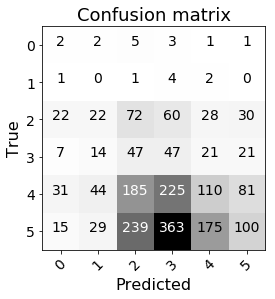

In [4]:
stats.print_all_stats(res1['y_true'], res1['y_pred'])

exp1_data = stats.get_all_stats(res1['y_true'], res1['y_pred'])
# %store exp1_data

stats.plot_confusion_matrix(stats.cm(res1['y_true'], res1['y_pred']), classes=np.arange(6))

In [5]:
## Store Results
data.save('../tmp/e6_exp_01', res1)
data.load('../tmp/e6_exp_01')

{'y_pred': array([2, 3, 4, ..., 0, 3, 2]),
 'y_pred_raw': array([0.40482692, 0.59591775, 0.77272727, ..., 0.        , 0.66666667,
        0.41293204]),
 'y_true': array([4., 5., 4., ..., 2., 5., 2.]),
 'y_true_raw': array([3.5, 5. , 4. , ..., 2.5, 5. , 1.5])}

### Exp. 2: Lang=English, Lexical_Matching=False, MA=3

In [6]:
res2 = wn.run_entailment_model_k(nlp_en, df_en, sim_fn=lin_fn, 
                                  lang='eng',
                                  stop_words=pp.EN_STOPS,
                                  add_lexical_matching=False,
                                  open_classes=['NOUN', 'VERB', 'ADJ'],
                                  ma_count=3)

batch: 100 done.
batch: 200 done.
batch: 300 done.
batch: 400 done.
batch: 500 done.
batch: 600 done.
batch: 700 done.
batch: 800 done.
batch: 900 done.
batch: 1000 done.
batch: 1100 done.
batch: 1200 done.
batch: 1300 done.
batch: 1400 done.
batch: 1500 done.
batch: 1600 done.
batch: 1700 done.
batch: 1800 done.
batch: 1900 done.
batch: 2000 done.


             precision    recall  f1-score   support

        0.0       0.05      0.14      0.07        14
        1.0       0.04      0.12      0.06         8
        2.0       0.15      0.20      0.17       234
        3.0       0.07      0.35      0.12       157
        4.0       0.32      0.25      0.28       676
        5.0       0.45      0.17      0.24       921

avg / total       0.34      0.21      0.24      2010

Pearson's R: 0.12854186733942924
Cohen's Kappa: -0.0025677743841552303
MAE: 0.7487562189054726
Accuracy: 21.34%
Precision: 33.56%
Recall: 21.34%
F1-Measure: 23.62%


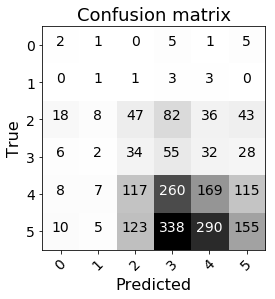

In [7]:
stats.print_all_stats(res2['y_true'], res2['y_pred'])

exp2_data = stats.get_all_stats(res2['y_true'], res2['y_pred'])
# %store exp2_data

stats.plot_confusion_matrix(stats.cm(res2['y_true'], res2['y_pred']), classes=np.arange(6))

In [8]:
## Store Results
data.save('../tmp/e6_exp_02', res2)
data.load('../tmp/e6_exp_02')

{'y_pred': array([2, 3, 4, ..., 0, 3, 2]),
 'y_pred_raw': array([0.49212732, 0.59591775, 0.77272727, ..., 0.        , 0.66666667,
        0.41293204]),
 'y_true': array([4., 5., 4., ..., 2., 5., 2.]),
 'y_true_raw': array([3.5, 5. , 4. , ..., 2.5, 5. , 1.5])}

### Exp. 3: Need Information Content for Spanish